<img src="Python.png" width="800">

# Importing the necessary libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Pre-processing

## Defining data sources

In [3]:
URL_LISTINGS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/listings.csv"
URL_LISTINGS_DETAILED = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/listings.csv.gz"
URL_REVIEWS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/reviews.csv"
URL_REVIEWS_DETAILED = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/reviews.csv.gz"
URL_CALENDAR = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/calendar.csv.gz"
URL_NEIGHBOURHOODS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/neighbourhoods.csv"
URL_NEIGHBOURHOODS_GEO = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/neighbourhoods.geojson"

## Loading data sets into pandas

In [4]:
df_listings = pd.read_csv(URL_LISTINGS)
df_listings_detailed = pd.read_csv(URL_LISTINGS_DETAILED, compression='gzip')
# df_reviews = pd.read_csv(URL_REVIEWS)
# df_reviews_detailed = pd.read_csv(URL_REVIEWS_DETAILED, compression='gzip')
df_calendar = pd.read_csv(URL_CALENDAR, compression='gzip')
df_neighbourhoods = pd.read_csv(URL_NEIGHBOURHOODS)

In [5]:
dfc_listings = df_listings.copy()
dfc_listings_detailed = df_listings_detailed.copy()
#dfc_reviews = df_reviews.copy()
#dfc_reviews_detailed = df_reviews_detailed.copy()
dfc_calendar = df_calendar.copy()
dfc_neighbourhoods = df_neighbourhoods.copy()

## Data Exploration

Let us have a look at the dataset. First of all we want to know the size, the columns and the type of the dataset.

In [13]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20352 entries, 0 to 20351
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20352 non-null  int64  
 1   name                            20349 non-null  object 
 2   host_id                         20352 non-null  int64  
 3   host_name                       20347 non-null  object 
 4   neighbourhood_group             20352 non-null  object 
 5   neighbourhood                   20352 non-null  object 
 6   latitude                        20352 non-null  float64
 7   longitude                       20352 non-null  float64
 8   room_type                       20352 non-null  object 
 9   price                           20352 non-null  int64  
 10  minimum_nights                  20352 non-null  int64  
 11  number_of_reviews               20352 non-null  int64  
 12  last_review                     

Secoundly a statistical description helps to give a feeling for the dataset. Here we only choose coloums for which this description makes sense.

In [50]:
df_listings[['price','minimum_nights','number_of_reviews','calculated_host_listings_count', 'availability_365']].describe(include='all')

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000
mean,115.756732,6.120381,31.665537,11.183471,153.010711
std,354.502984,30.964229,63.130360,28.264229,149.119819
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000,1.000000,0.000000
50%,59.000000,2.000000,4.000000,2.000000,90.000000
75%,100.000000,3.000000,32.000000,7.000000,340.000000
max,9999.000000,1125.000000,678.000000,197.000000,365.000000


## Outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8097,25226806,La Latina Experience,34129781,Javier,Centro,Palacio,40.41145,-3.71063,Entire home/apt,9999,1,9,2019-07-15,0.29,3,351
12125,34851930,Alaia Holidays duplex apartment at Gran Vía,106745942,Alaia,Centro,Justicia,40.42353,-3.70027,Entire home/apt,9999,1,6,2020-02-23,0.33,6,0
4099,16140561,Charming Chamberí - Cozy Attic in the Center,2203799,Lisa,Chamberí,Trafalgar,40.43338,-3.69893,Entire home/apt,9999,2,53,2019-09-30,1.12,1,76
2248,9440377,"1 MAGDALENA 38, QUIET AND CENTRAL",3746437,Nuria,Centro,Embajadores,40.41230,-3.69983,Entire home/apt,9200,1,11,2018-12-14,0.18,4,0
8814,27187514,habitacion por meses,6637077,Jesus,Latina,Puerta del Angel,40.41341,-3.72609,Private room,9000,800,0,NaN,NaN,2,365


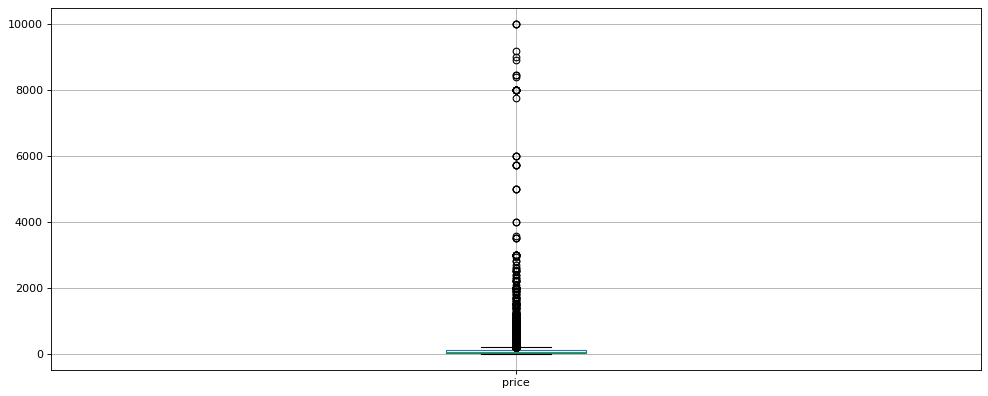

In [7]:
plt.figure(num = None, figsize=(15, 6), dpi=80)

dfc_listings.boxplot(column='price')
dfc_listings.sort_values(by=['price'], ascending = False).head()